In [1]:
!pip install ultralytics
from ultralytics.utils import metrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
import albumentations as A
import numpy as np
import cv2
from PIL import Image
from pathlib import Path
from tqdm import tqdm
import yaml
import os
import random
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [3]:
%pip install ultralytics
import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.1/107.7 GB disk)


In [5]:
def images_preprocessing(images):
    processed_images = []
    for img in images:
        img_resized = cv2.resize(img, (640,640))
        processed_images.append(img_resized)

    return np.array(processed_images)
# Assuming 'train_path' and 'val_path' are defined as before
train_path = '/content/drive/MyDrive/yolo dataset testing/Train'
val_path = '/content/drive/MyDrive/yolo dataset testing/Val'


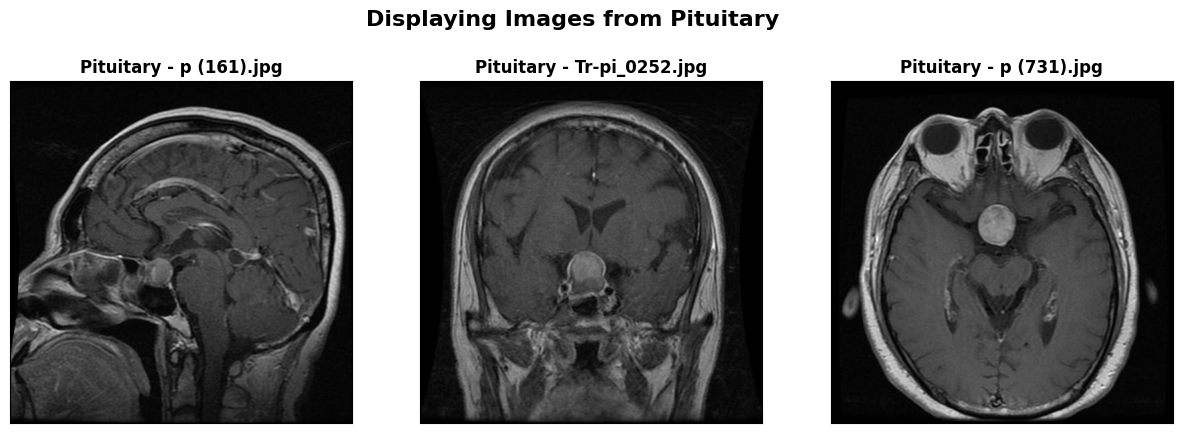

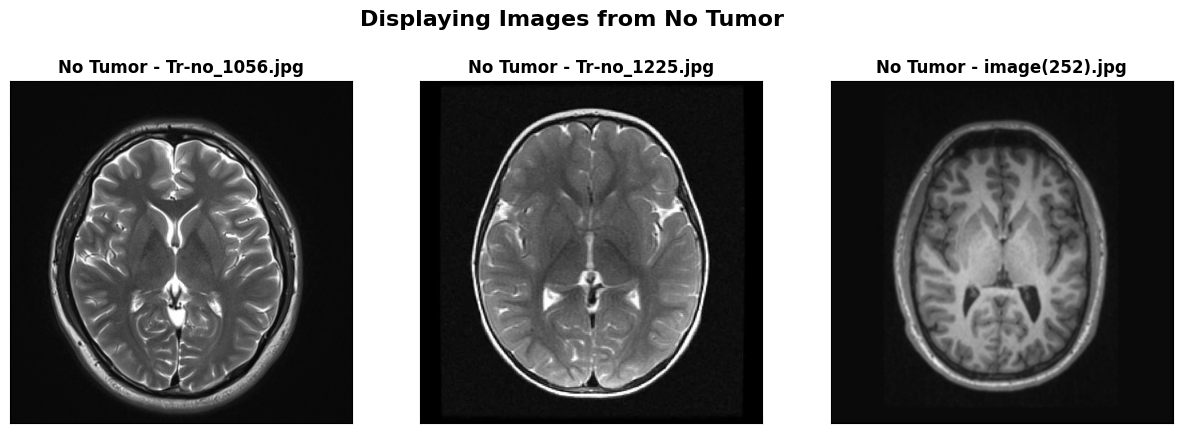

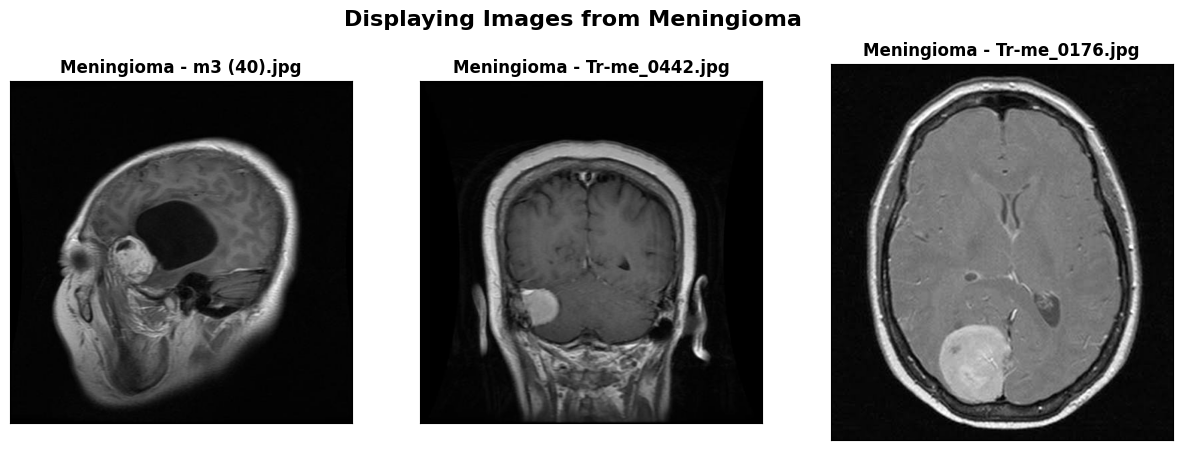

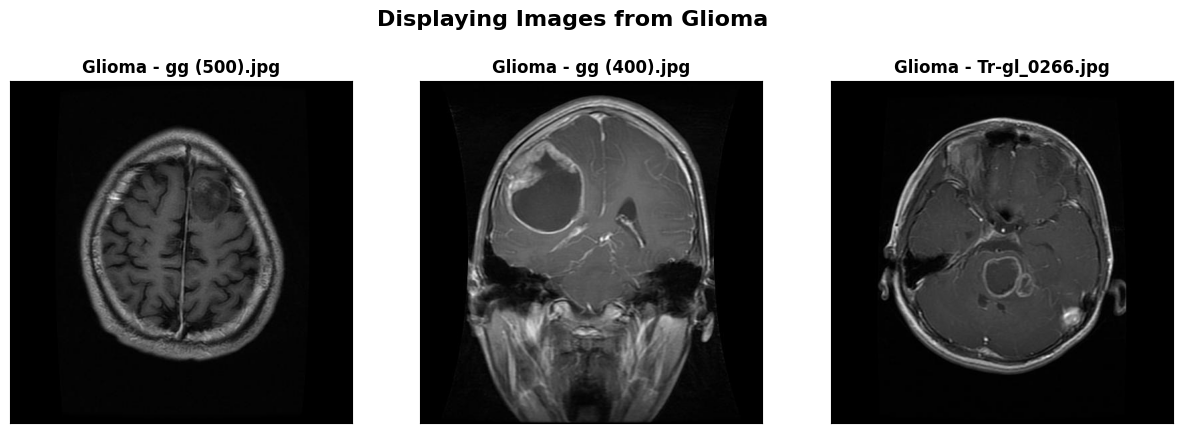

In [6]:
def display_random_images(directory, num_images=3):

    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        images_path = os.path.join(directory, class_name, 'images')

        images = os.listdir(images_path)
        selected_images = random.sample(images, num_images)

        fig, axes = plt.subplots(1,3, figsize=(15,5))

        fig.suptitle(f"Displaying Images from {class_name}", fontsize=16, fontweight='bold')

        for ax, image in zip(axes, selected_images):
            image_path = os.path.join(images_path, image)
            img = mpimg.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax.imshow(img)
            ax.set_title(f"{class_name} - {os.path.basename(image)}",fontweight='bold')
            ax.set_xticks([])
            ax.set_yticks([])


display_random_images(train_path)

In [7]:
import os # Import the os module
import pandas as pd # Import pandas and assign it to the alias 'pd'
import plotly.graph_objects as go # Import plotly.graph_objects and assign it to the alias 'go'

def count_images_in_folders(base_path):
    image_counts = []

    # Get all directories in the base_path
    main_directories = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

    for main_dir in main_directories:
        images_dir_path = os.path.join(base_path, main_dir, 'images')

        images = [f for f in os.listdir(images_dir_path) if os.path.isfile(os.path.join(images_dir_path, f))]

        print(f'\033[1mNumber of Images in {main_dir} : {len(images)}\033[0m')
        image_counts.append({'Class': main_dir, 'Count': len(images)})
    df = pd.DataFrame(image_counts).sort_values(by='Count',ascending=False)

    colors = ['#a6a832','#32a0a8', '#599173', '#bfbf95']
    fig = go.Figure(data=[go.Pie(labels=df['Class'], values = df['Count'], pull=[0.1,0,0,0],
                             textinfo ='label+percent', marker=dict(colors=colors, line=dict(color='black', width=2)))])
    fig.update_layout(paper_bgcolor='#dff2ef', plot_bgcolor='#dff2ef', title = 'Number of Images in Each Class', width=650, height=600, title_x=0.5,
                  title_font_family="Times New Roman", title_font_color="#191e1f", title_font_size=30, font_family="Times New Roman", font_size=15)
    fig.show()
    return

base_path = '/content/drive/MyDrive/yolo dataset testing/Train'
count_images_in_folders(base_path)

Number of Images in Pituitary : 1424
Number of Images in No Tumor : 711
Number of Images in Meningioma : 1449
Number of Images in Glioma : 1153


In [8]:
import yaml # Import the yaml module

dataset_yaml = {
    'path': '/content/drive/MyDrive/yolo dataset testing',
    'train': 'Train',
    'val': 'Val',
    'names': ["Glioma", "Meningioma", "No Tumor", "Pituitary"]
}

with open('/content/drive/MyDrive/yolo dataset testing/dataset_yaml.yaml', 'w') as file:
    yaml.dump(dataset_yaml, file)

In [9]:
from ultralytics import YOLO # Import the YOLO class from ultralytics

model = YOLO('yolov8n.yaml')
model = YOLO('yolov8n.pt')
train_results = model.train(data='/content/drive/MyDrive/yolo dataset testing/dataset_yaml.yaml' , epochs=5, imgsz=640)

100%|██████████| 6.25M/6.25M [00:00<00:00, 76.1MB/s]


Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/yolo dataset testing/dataset_yaml.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

100%|██████████| 755k/755k [00:00<00:00, 13.8MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/yolo dataset testing/Train/Glioma/labels.cache... 4737 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4737/4737 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/yolo dataset testing/Val/Glioma/labels.cache... 510 images, 3 backgrounds, 0 corrupt: 100%|██████████| 512/512 [00:00<?, ?it/s]

Plotting labels to runs/detect/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.023       2.37       1.22          2        640: 100%|██████████| 297/297 [1:39:13<00:00, 20.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [05:12<00:00, 19.53s/it]

                   all        512        554      0.522      0.581      0.542      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.023      1.386      1.207          1        640: 100%|██████████| 297/297 [1:16:59<00:00, 15.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [02:59<00:00, 11.25s/it]

                   all        512        554      0.836      0.756      0.851      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.002      1.089      1.183          1        640: 100%|██████████| 297/297 [1:16:32<00:00, 15.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [02:51<00:00, 10.75s/it]

                   all        512        554      0.823      0.833      0.884      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G     0.9283     0.8901      1.147          3        640: 100%|██████████| 297/297 [1:17:00<00:00, 15.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [03:21<00:00, 12.62s/it]

                   all        512        554      0.852      0.843      0.892       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G     0.8721     0.7503       1.11          1        640: 100%|██████████| 297/297 [1:17:20<00:00, 15.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [02:54<00:00, 10.91s/it]

                   all        512        554      0.942      0.897      0.947      0.724



5 epochs completed in 7.077 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [02:39<00:00,  9.96s/it]


                   all        512        554      0.942      0.897      0.947      0.724
                Glioma        135        153      0.901      0.778      0.885      0.682
            Meningioma        140        142      0.991      0.972      0.988      0.789
              No Tumor         98         98      0.978      0.912      0.965      0.712
             Pituitary        154        161      0.898      0.928      0.949      0.712
Speed: 3.2ms preprocess, 287.8ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train


Number of Labels in Pituitary : 1424
Number of Labels in No Tumor : 711
Number of Labels in Meningioma : 1449
Number of Labels in Glioma : 1153


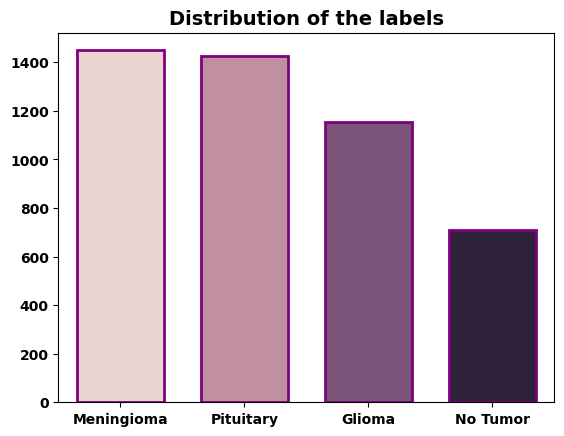

In [10]:
import os # Import the os module
import pandas as pd # Import pandas and assign it to the alias 'pd'
import seaborn as sns # Import seaborn and assign it to the alias 'sns'
import matplotlib.pyplot as plt # Import matplotlib.pyplot and assign it to the alias 'plt'

def count_labels_in_folders(base_path):
    label_counts = []

    # Get all directories in the base_path
    main_directories = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

    for main_dir in main_directories:
        label_dir_path = os.path.join(base_path, main_dir, 'labels')

        labels = [f for f in os.listdir(label_dir_path) if os.path.isfile(os.path.join(label_dir_path, f))]

        print(f'\033[1mNumber of Labels in {main_dir} : {len(labels)}\033[0m')
        label_counts.append({'Class': main_dir, 'Count': len(labels)})
    df1 = pd.DataFrame(label_counts).sort_values(by='Count',ascending=False)

    sns.barplot(df1, x='Class', y='Count', width=0.7, edgecolor='purple', linewidth=2, palette=sns.cubehelix_palette(n_colors=len(df1)))

    plt.title("Distribution of the labels", weight='bold', fontsize=14)
    plt.xticks(color='black',weight='bold')
    plt.yticks(color='black',weight='bold')
    plt.xlabel('', weight='bold', fontsize=14)
    plt.ylabel('',weight='bold', fontsize=14)
    plt.grid(False)

    return

base_path = '/content/drive/MyDrive/yolo dataset testing/Train'
count_labels_in_folders(base_path)

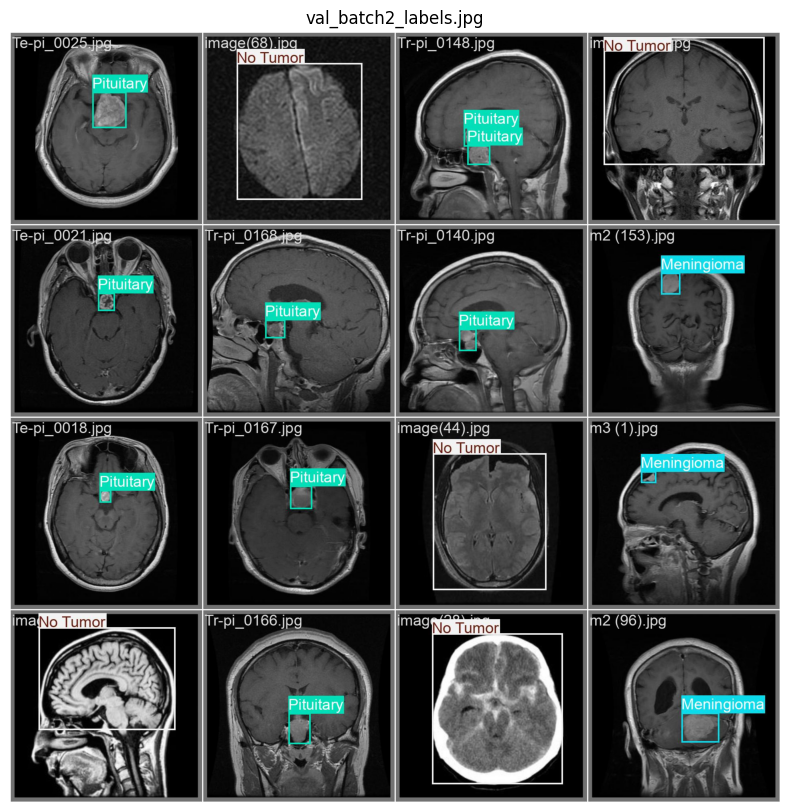

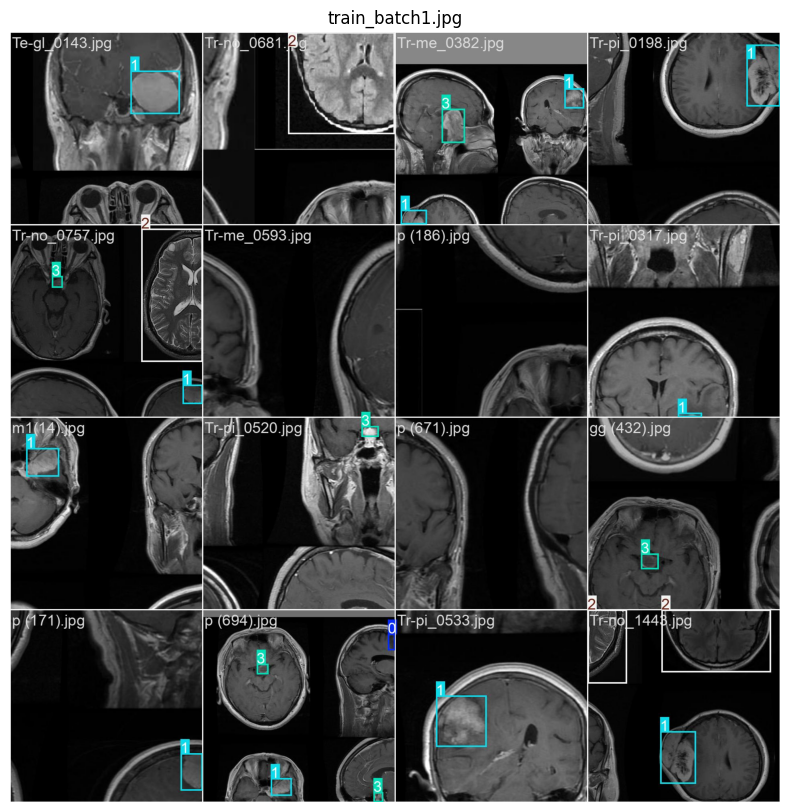

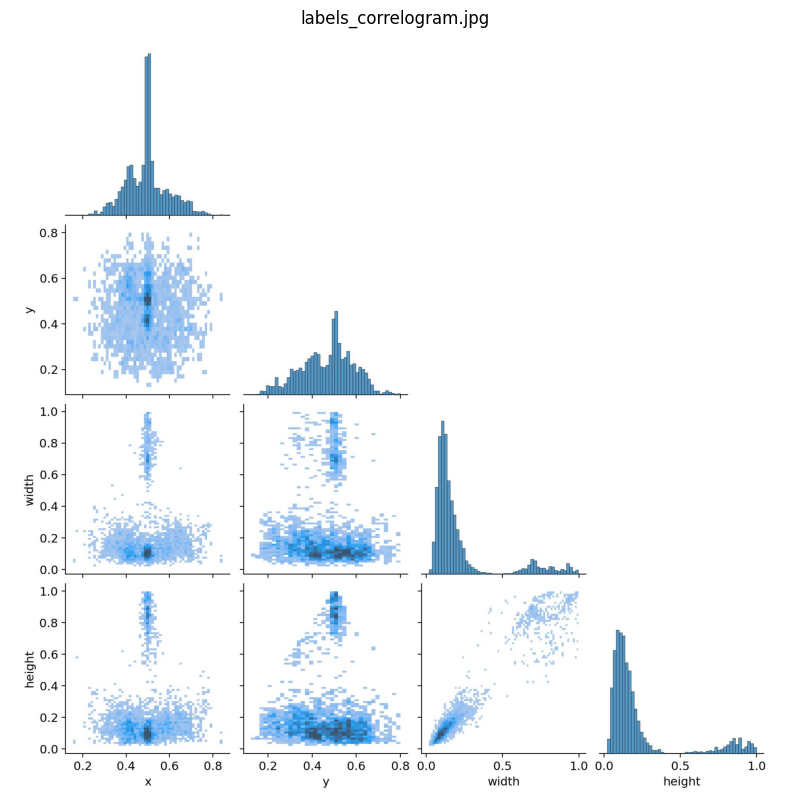

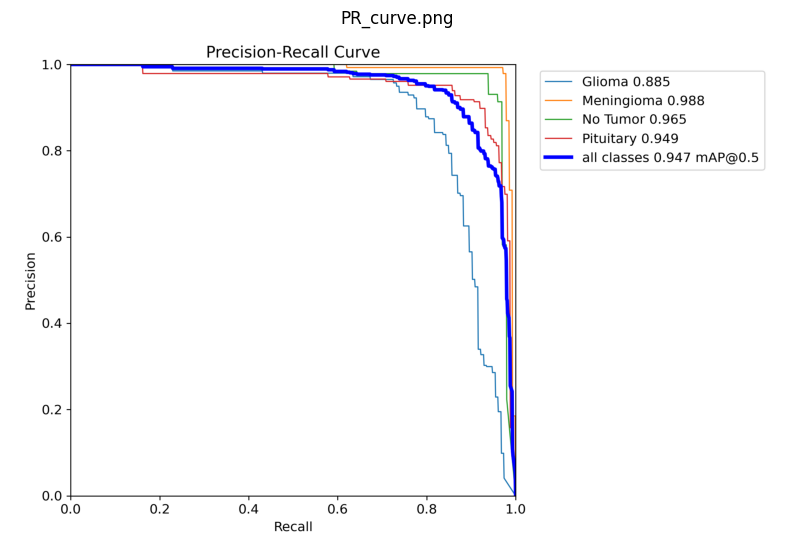

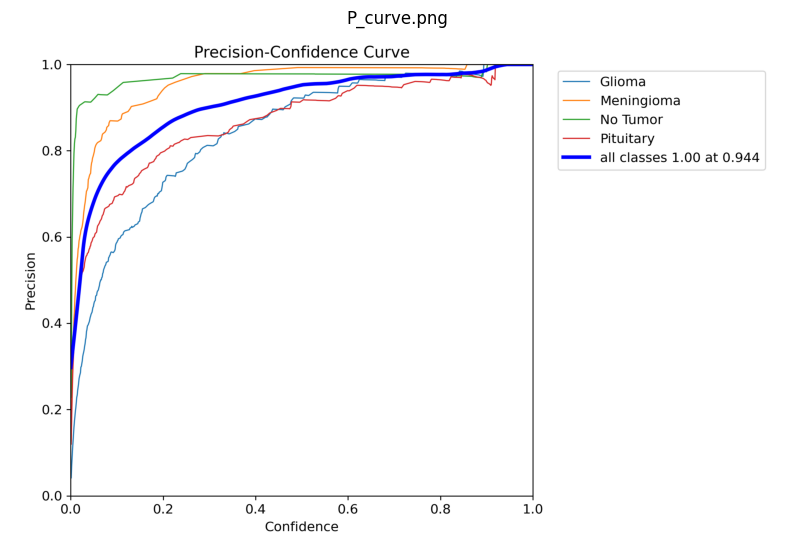

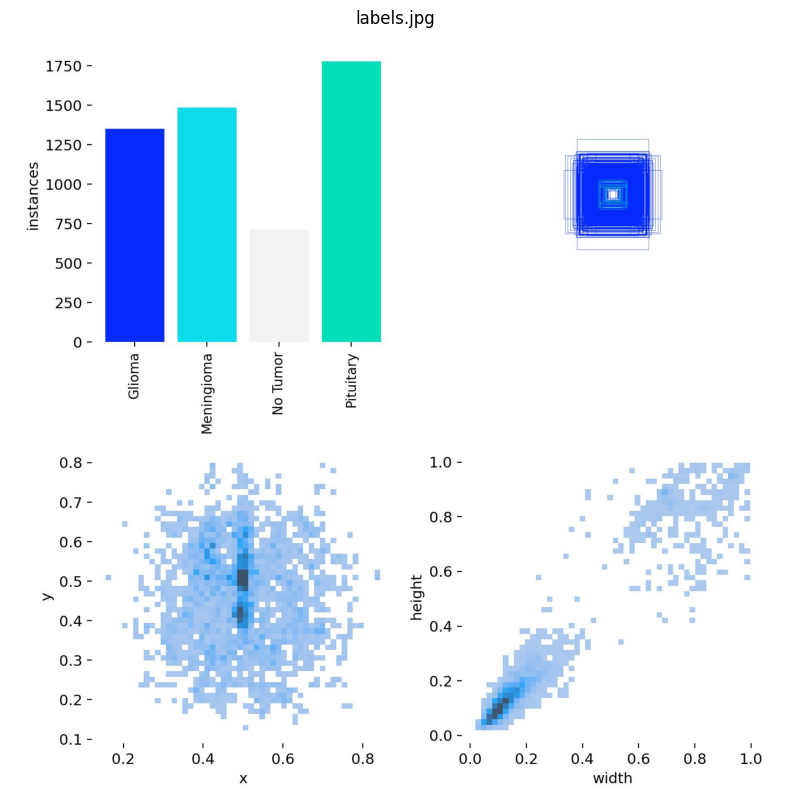

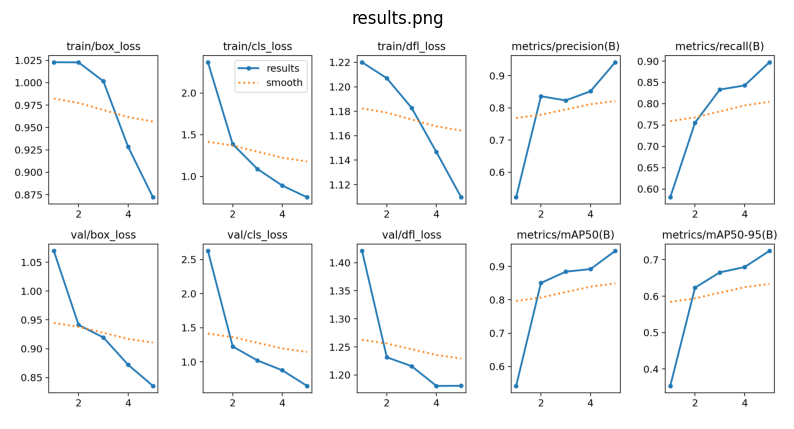

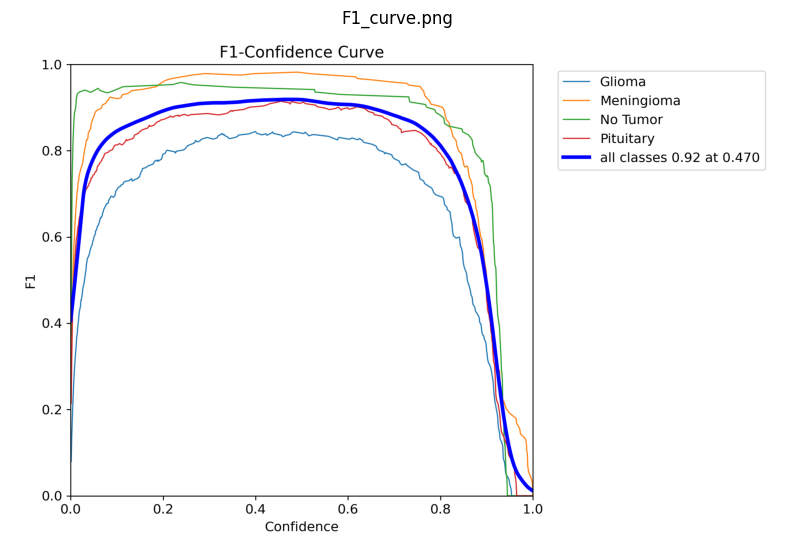

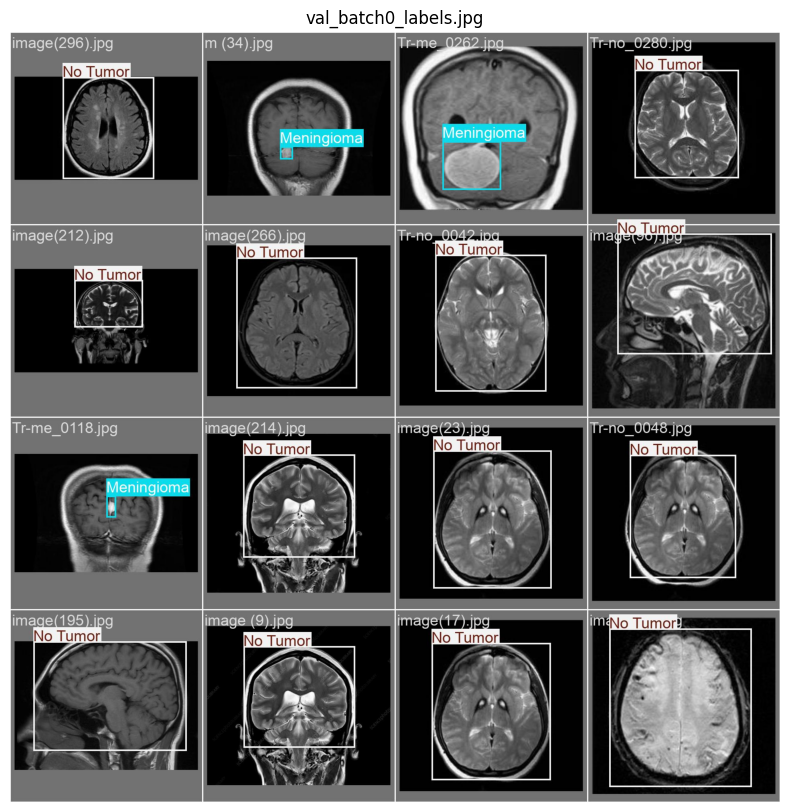

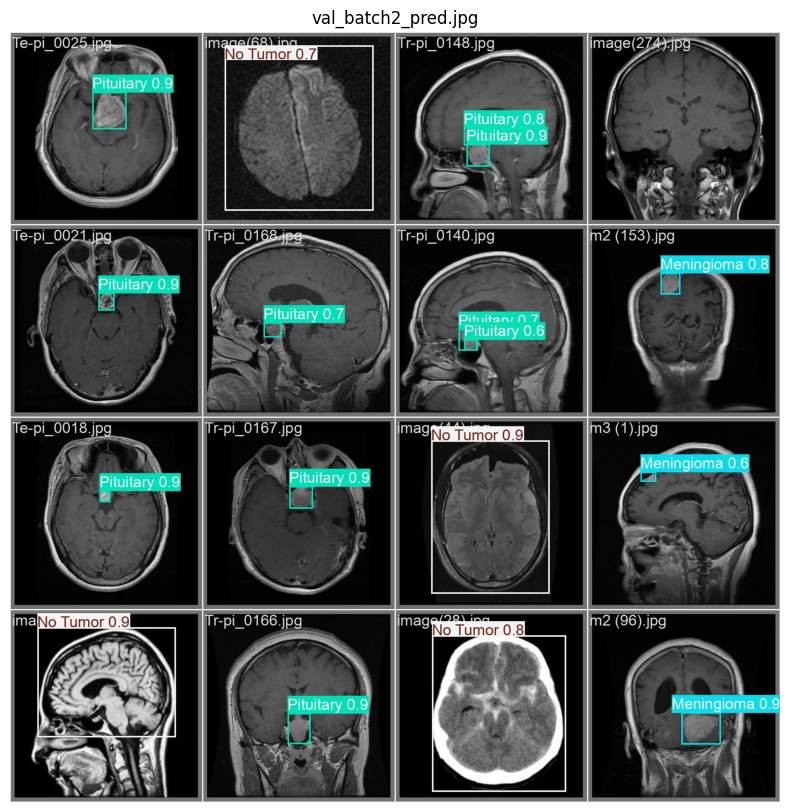

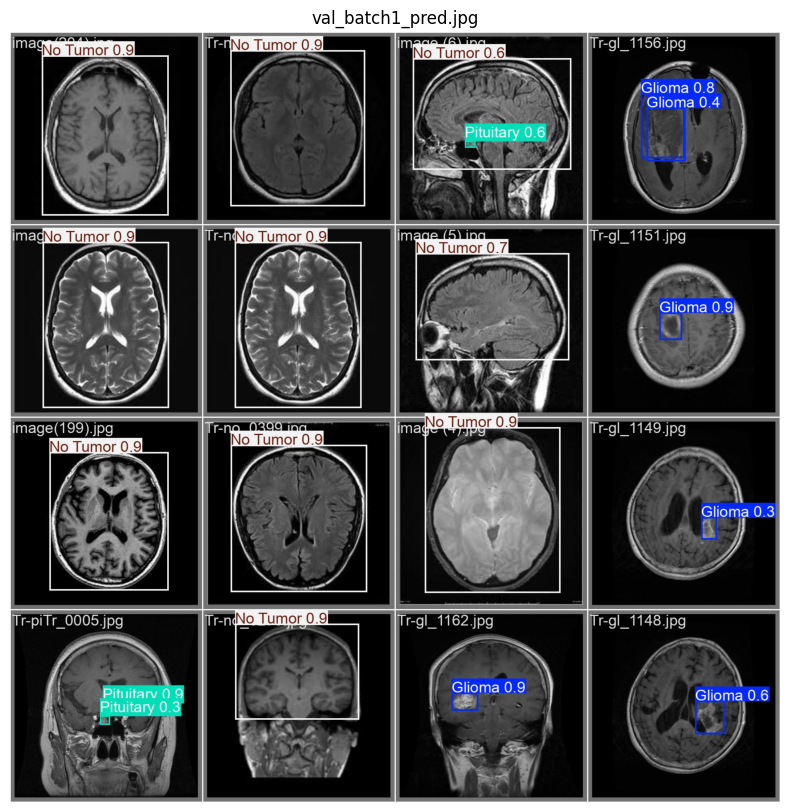

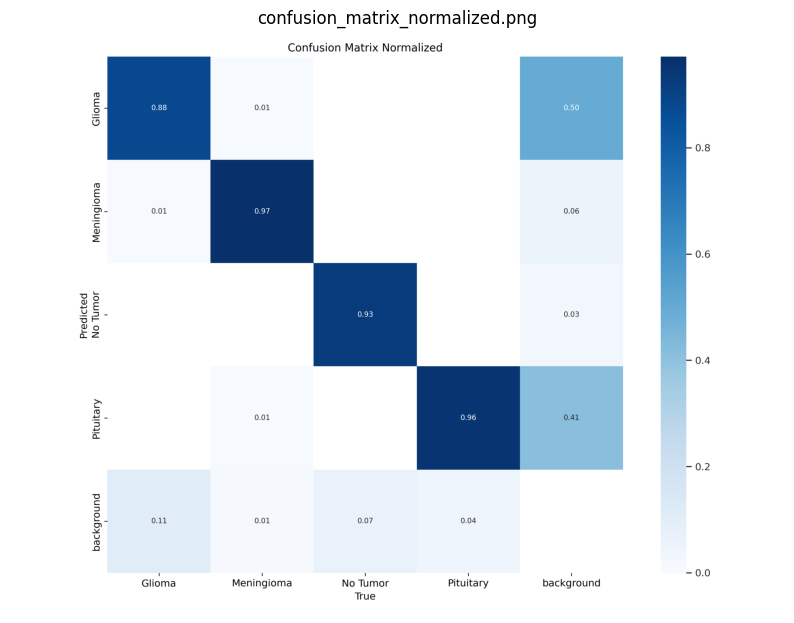

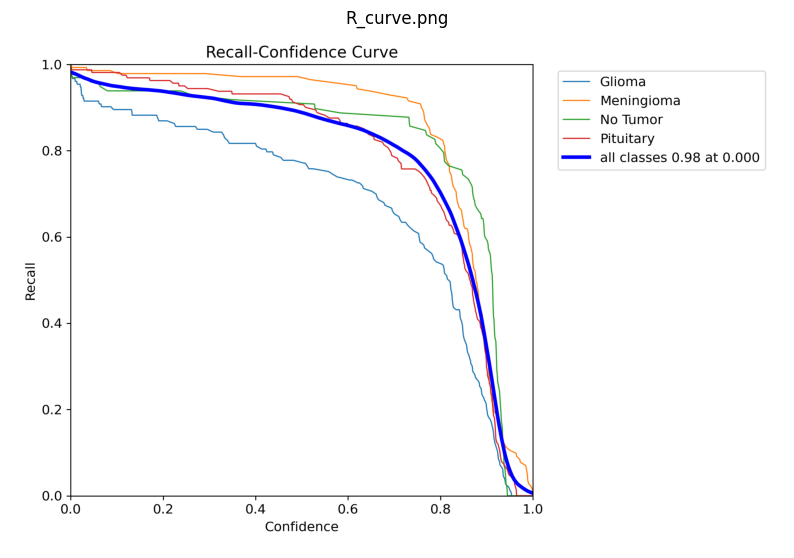

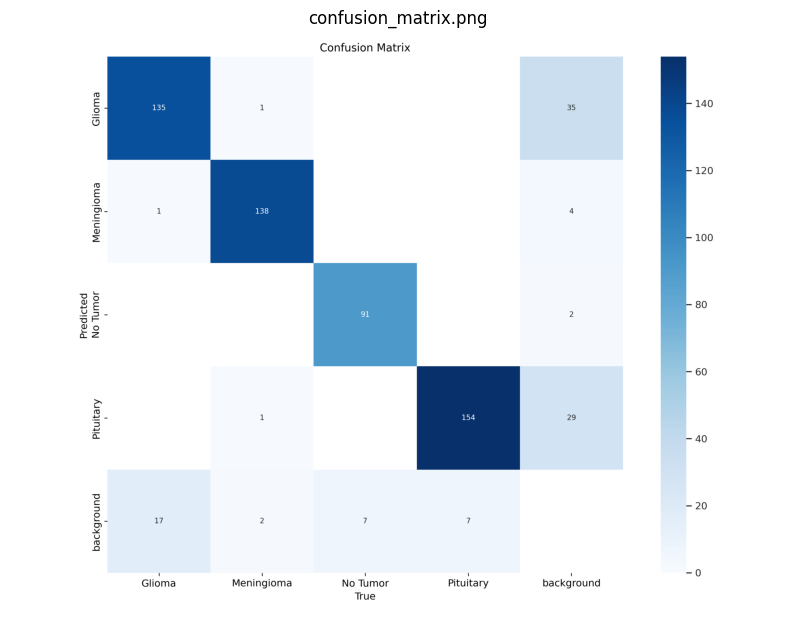

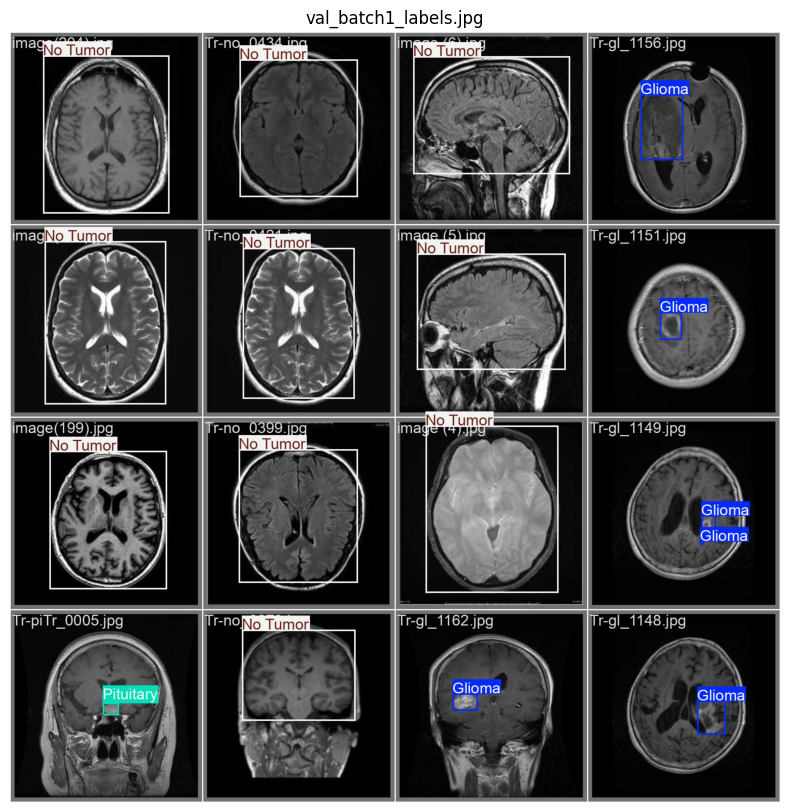

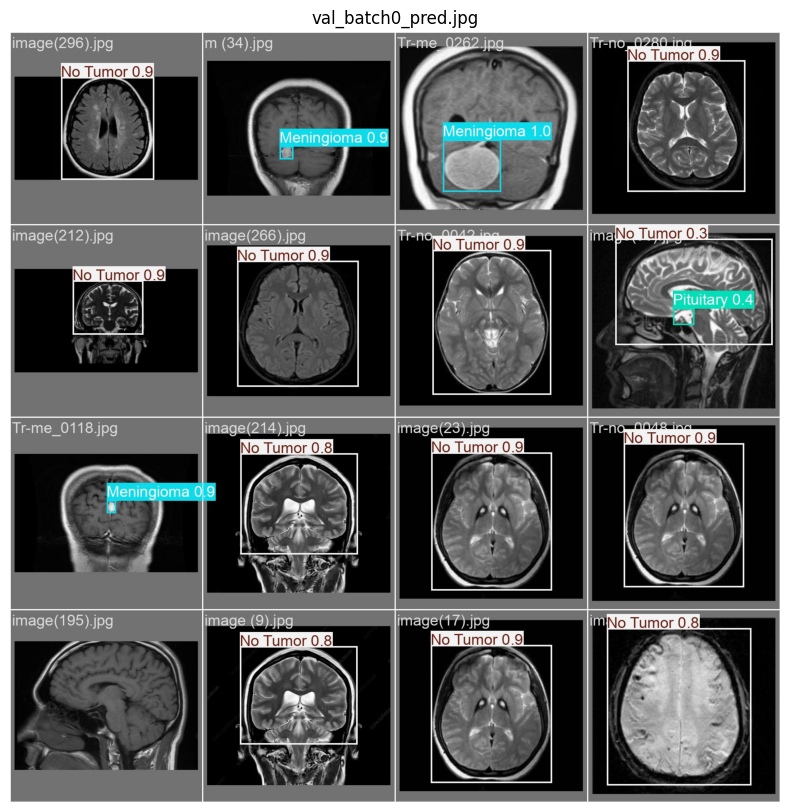

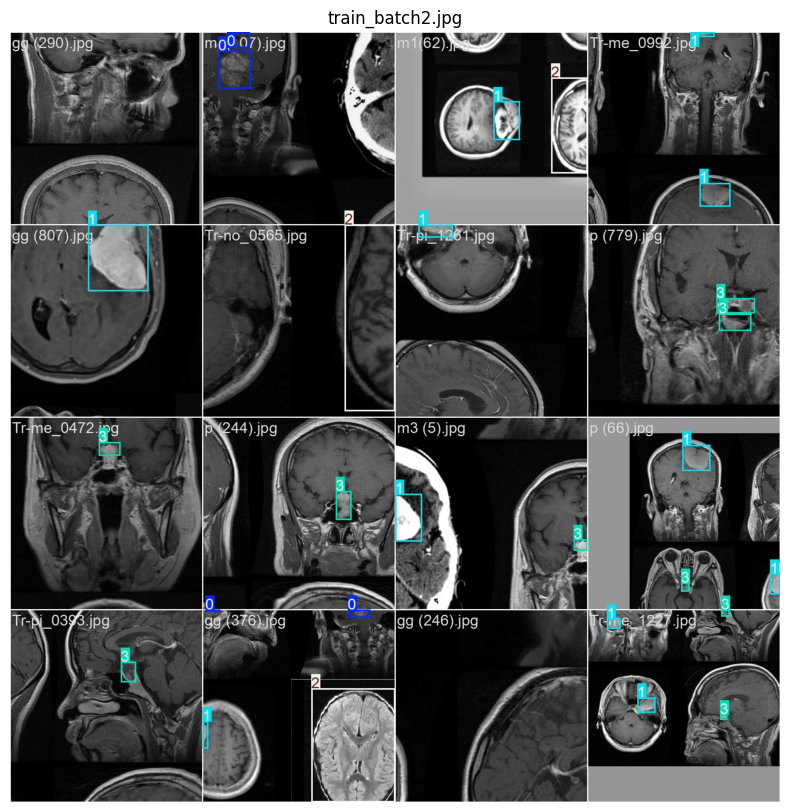

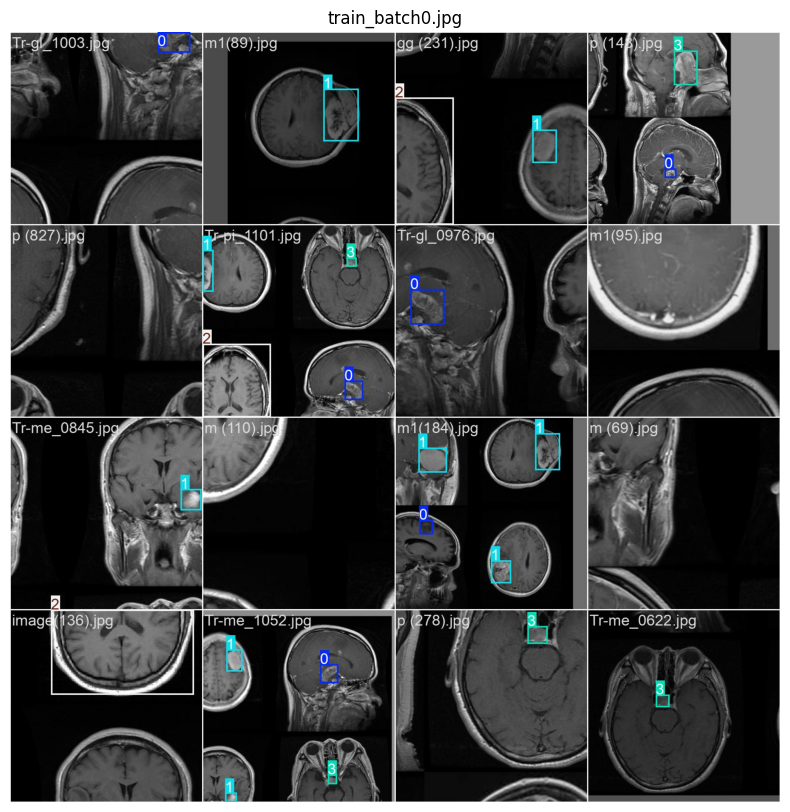

In [11]:
# Path to the results directory (adjust the path based on your setup)
results_dir = '/content/runs/detect/train'

# Import the necessary module
from PIL import Image

# List all images in the directory
result_images = [img for img in os.listdir(results_dir) if img.endswith('.jpg') or img.endswith('.png')]

# Display the images
for img_name in result_images:
    img_path = os.path.join(results_dir, img_name)

    # Use Image.open() to open the image file
    img = Image.open(img_path)

    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')
    plt.show()

In [43]:
model.export(format="onnx", imgsz=640)

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from '/content/yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 183.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 272.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 224.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 179.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 213.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 11.1s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ON

'/content/yolov8n.onnx'

In [44]:
import onnxruntime as rt
import numpy as np
import cv2

class BrainTumorDetector:
    def __init__(self, model_path):
        self.session = rt.InferenceSession(model_path)
        self.input_name = self.session.get_inputs()[0].name
        self.output_name = self.session.get_outputs()[0].name

    def predict(self, image):
        # Preprocess the image
        img = cv2.resize(image, (640, 640))
        img = img.transpose(2, 0, 1)
        img = img.astype(np.float32) / 255.0
        img = np.expand_dims(img, axis=0)

        # Perform inference
        results = self.session.run([self.output_name], {self.input_name: img})

        # Postprocess the results (e.g., extract bounding boxes, class labels, and confidence scores)
        # ...

        return results